# MNIST classifier **Exercise**





In this exercise, you will apply what you've learned to build, train, and evaluate a neural network to classify handwritten digits from the famous MNIST dataset.


# Step 1: Import the libraries

Step 1: Setup and Imports
First, we import the necessary libraries and, most importantly, set up our device. This ensures our code will use a GPU for faster training if one is available.

In [1]:
# --- Core PyTorch and data handling libraries ---
import random
import numpy as np
import torch
from torch import nn
from torch.utils.data import DataLoader
import torchvision
from torchvision import datasets, transforms

# --- Visualization and analysis ---
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# --- Device and reproducibility ---
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

SEED = 42
random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)


Using device: cpu


## Step 2 — Prepare the dataset transforms and load MNIST

We will scale images to `[0,1]` with `ToTensor()` and then **standardize** with mean/std for MNIST. Keep these lines unchanged for the lab.

In [2]:
# MNIST statistics (train set)
mnist_mean = 0.1307
mnist_std = 0.3081

transform = transforms.Compose([
    # Resize the image to 28x28 pixels
    transforms.Resize((28, 28)),
    # Convert the image to a PyTorch tensor
    # ** Fill in the code below **
    transforms.ToTensor(),
    # Normalize the image with mean and standard deviation
    #** Fill in the code below **
    transforms.Normalize((mnist_mean,), (mnist_std,))

])

train_set = datasets.MNIST(root='data', train=True, download=True, transform=transform)
test_set  = datasets.MNIST(root='data', train=False, download=True, transform=transform)

print('Train samples:', len(train_set))
print('Test samples :', len(test_set))


100%|██████████| 9.91M/9.91M [00:02<00:00, 4.72MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 380kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 3.14MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 4.41MB/s]

Train samples: 60000
Test samples : 10000


### Visualize some training samples
The images are normalized. The helper function below **unnormalizes** them before plotting so they appear correctly.

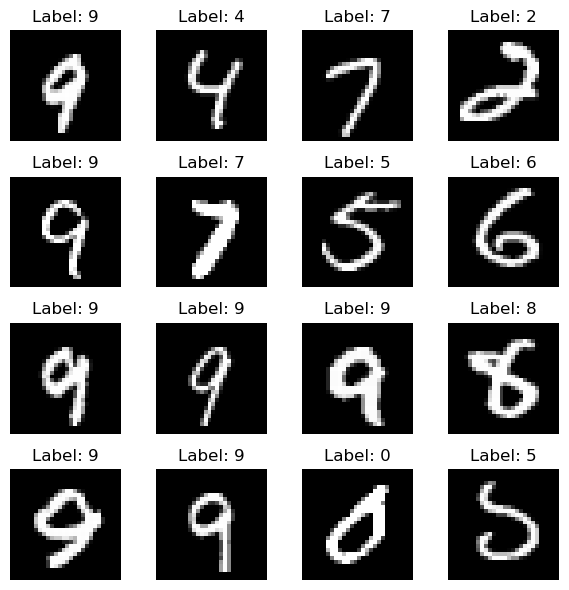

In [3]:
def imshow_normalized(tensor_img, mean=mnist_mean, std=mnist_std):
    """Unnormalize a CxHxW tensor and plot it as HxW (grayscale)"""
    img = tensor_img.clone().cpu().numpy()
    img = img * std + mean
    plt.imshow(img.squeeze(), cmap='gray')
    plt.axis('off')

plt.figure(figsize=(6,6))
cols, rows = 4, 4
for i in range(1, cols*rows + 1):
    idx = random.randint(0, len(train_set)-1)
    img, label = train_set[idx]
    plt.subplot(rows, cols, i)
    imshow_normalized(img)
    plt.title(f"Label: {label}")
plt.tight_layout()
plt.show()


## Step 3 — Create DataLoaders

Create `DataLoader`s for training and testing. Leave `shuffle=True` for training.

In [5]:
""""DataLoader basically handles grouping data into batches, shuffling data every epoch to prevnt model from 
learning the order of the data and to prevent overfitting, and using multiple workers to load data in parallel for efficiency.
"""
BATCH_SIZE = 64
train_loader = DataLoader(dataset=train_set, batch_size=BATCH_SIZE, shuffle=True)
test_loader  = DataLoader(dataset=test_set, batch_size=BATCH_SIZE, shuffle=False)

print('Train batches:', len(train_loader))
print('Test  batches:', len(test_loader))


Train batches: 938
Test  batches: 157


## Step 4 — Define your network 

Implement a PyTorch `nn.Module` for classification. 

Below is a skeleton: fill in the `TODO` parts.

Hints:
- Input size is `28*28` after flattening.
- Output size must be `10` (classes 0..9).
- Use `nn.ReLU()` activations and `nn.Linear` layers.


In [18]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        # TODO: build your network layers here
        try:
            self.flatten = nn.Flatten()
            self.linear_relu_stack = nn.Sequential(
                #first fully connected layer: 784 inputs (28*28), 512 outputs
                nn.Linear(28*28, 512),
                # introduce non linearity with ReLU activation function
                nn.ReLU(inplace=True),  # ReLU is a rectified linear unit activation function that outputs the input directly if it is positive; otherwise, it will output zero.
                
                #second fully connected layer: 512 inputs, 512 outputs
                nn.Linear(512, 512),
                nn.ReLU(inplace=True),

                #output layer: 512 inputs, 10 outputs (one for each class)
                nn.Linear(512, 10)
            )
        except NotImplementedError as e:
            print("Define your network layers in __init__", e)

    def forward(self, x):
        # TODO: implement forward pass
        try:
            x = self.flatten(x)
            logits = self.linear_relu_stack(x)
            return logits
        except NotImplementedError as e: 
            print("Implement forward() to return logits", e)

# Initialize model (students should implement the class above first)
try:
    model = NeuralNetwork().to(device)
    print(model)
except NotImplementedError as e:
    print('Model not defined yet — fill the TODO in the class above.')


NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU(inplace=True)
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU(inplace=True)
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


## Step 5 — Training setup 

Create the loss function, optimizer and a training loop. Fill the TODOs below. Use `nn.CrossEntropyLoss()` for the loss and `torch.optim.SGD` or `Adam` for the optimizer.

Implement `train_loop` and `test_loop` 

In [21]:
# Hyperparameters (feel free to experiment)
learning_rate = 1e-2

# TODO: choose loss and optimizer
# use CrossEntropyLoss for multi-class classification
loss_fn = nn.CrossEntropyLoss()
# use Adam optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [ ]:
# Optional, feel free to implement something else you are comfortable with
def train_loop(dataloader, model, loss_fn, optimizer, device):
    """Train for one epoch. Return (avg_loss, accuracy_fraction).
    Implement per-sample loss averaging and exact accuracy counting.
    """
    # implement training loop
    try: 
        # put model into training mode
        model.to(device)
        model.train()

        total_samples = 0
        avg_loss = 0.0
        accuracy_fraction = 0.0

        for images, labels in dataloader:
            images, labels = images.to(device), labels.to(device)
            batch_size = images.shape[0]
            total_samples += batch_size

            # Forward pass: compute predicted outputs by passing inputs to the model that I defined earlier
            predictions = model(images)

            # Compute the loss using the loss function I defined earlier 
            loss = loss_fn(predictions, labels)

            # Zero the gradients before running the backward pass
            optimizer.zero_grad()  # zero the gradients so that they don't accumulate from previous batches, causing incorrect updates

            # backward pass: compute gradient of the loss with respect to model parameters
            loss.backward()

            # update parameters using optimizer
            optimizer.step()

            # log accuracy and loss
            accuracy = (predictions.argmax(1) == labels).type(torch.float).sum().item()
            accuracy_fraction += accuracy
            avg_loss += loss.item() * batch_size
        
        avg_loss /= total_samples
        accuracy_fraction /= total_samples
        return avg_loss, accuracy_fraction

    except NotImplementedError:
        print("Implement train_loop")

In [23]:
def test_loop(dataloader, model, loss_fn, device):
    """Evaluate on validation/test set. Return (avg_loss, accuracy_fraction)."""
    # TODO: implement test loop
    try:
        model.to(device)
        # put model into evaluation mode
        model.eval()

        total_samples = 0 
        avg_test_loss = 0
        accuracy_fraction_loss = 0

        # turn off gradients for validation, saves memory and computations
        with torch.no_grad():
            for images, labels in dataloader:
                # Move images and labels to device
                images, labels = images.to(device), labels.to(device)
                batch_size = images.shape[0]
                total_samples += batch_size

                # Forward pass: compute predicted outputs by passing inputs to the model
                predictions = model(images)

                # Compute the loss using the loss function
                loss = loss_fn(predictions, labels)

                # log accuracy and loss
                accuracy = (predictions.argmax(1) == labels).type(torch.float).sum().item()
                accuracy_fraction_loss += accuracy
                avg_test_loss += loss.item() * batch_size
        
        avg_test_loss /= total_samples
        accuracy_fraction_loss /= total_samples
        return avg_test_loss, accuracy_fraction_loss
    
    except NotImplementedError:
        print("Implement test_loop")


### Run training 

Fill the training loop above. Print per-epoch train/test loss and accuracy. Do not run this cell until you implemented the functions.

In [31]:
# Run training: implement the train_loop/test_loop first!
epochs = 12

# store loss and accuracy for every epoch in the training process so we can plot them later
train_losses = []
train_accuracies = []
test_losses = []
test_accuracies = []

try:
    for epoch in range(1, epochs+1):
        print(f"Epoch {epoch}/{epochs}")
        train_loss, train_acc = train_loop(train_loader, model, loss_fn, optimizer, device)
        test_loss, test_acc = test_loop(test_loader, model, loss_fn, device)

        # store metrics for plotting later
        train_losses.append(train_loss)
        train_accuracies.append(train_acc)
        test_losses.append(test_loss)
        test_accuracies.append(test_acc)
        
        print(f"Train loss: {train_loss:.4f}, Train acc: {100*train_acc:.2f}% | Test loss: {test_loss:.4f}, Test acc: {100*test_acc:.2f}%")
except NotImplementedError:
    print('Training loop or model not implemented yet. Fill the TODOs above before running training.')


Epoch 1/12
Train loss: 0.0763, Train acc: 97.89% | Test loss: 0.0906, Test acc: 97.25%
Epoch 2/12
Train loss: 0.0702, Train acc: 98.06% | Test loss: 0.0857, Test acc: 97.34%
Epoch 3/12
Train loss: 0.0648, Train acc: 98.22% | Test loss: 0.0852, Test acc: 97.48%
Epoch 4/12
Train loss: 0.0597, Train acc: 98.36% | Test loss: 0.0812, Test acc: 97.63%
Epoch 5/12
Train loss: 0.0556, Train acc: 98.52% | Test loss: 0.0774, Test acc: 97.73%
Epoch 6/12
Train loss: 0.0513, Train acc: 98.63% | Test loss: 0.0736, Test acc: 97.76%
Epoch 7/12
Train loss: 0.0478, Train acc: 98.73% | Test loss: 0.0757, Test acc: 97.64%
Epoch 8/12
Train loss: 0.0445, Train acc: 98.84% | Test loss: 0.0712, Test acc: 97.85%
Epoch 9/12
Train loss: 0.0414, Train acc: 98.94% | Test loss: 0.0690, Test acc: 97.93%
Epoch 10/12
Train loss: 0.0385, Train acc: 99.01% | Test loss: 0.0708, Test acc: 97.88%
Epoch 11/12
Train loss: 0.0359, Train acc: 99.09% | Test loss: 0.0664, Test acc: 97.85%
Epoch 12/12
Train loss: 0.0335, Train acc

## Step 6 — Evaluate & visualize (***Student Task***)

Once you have trained the model, compute and plot the learning curves, confusion matrix and some sample predictions. 

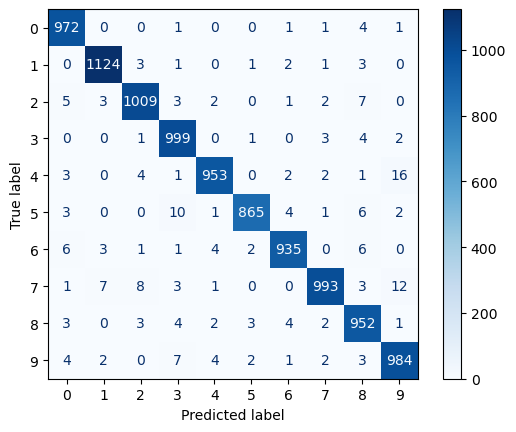

In [32]:
# plot confusion matrix 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# get predictions and true labels for the TEST set
model.eval() # put model in evaluation mode
all_preds = []
all_labels = []

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        preds = outputs.argmax(dim=1).cpu().numpy()
        all_preds.extend(preds)
        all_labels.extend(labels.cpu().numpy())

# compute confusion matrix
cm = confusion_matrix(all_labels, all_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[i for i in range(10)])
disp.plot(cmap=plt.cm.Blues)

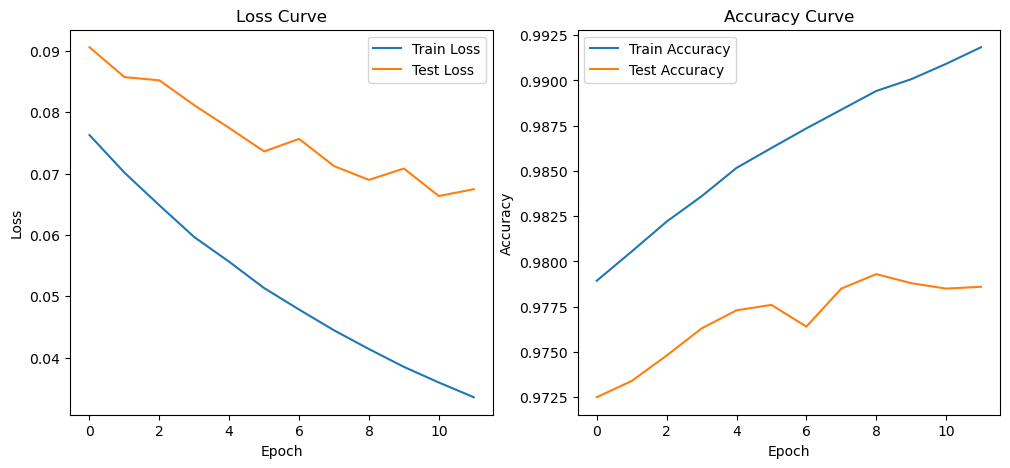

In [38]:
# plot learning curves for loss and accuracy
plt.figure(figsize=(12, 5))

# Loss
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.title("Loss Curve")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

# Accuracy
plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(test_accuracies, label='Test Accuracy')
plt.title("Accuracy Curve")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.show()

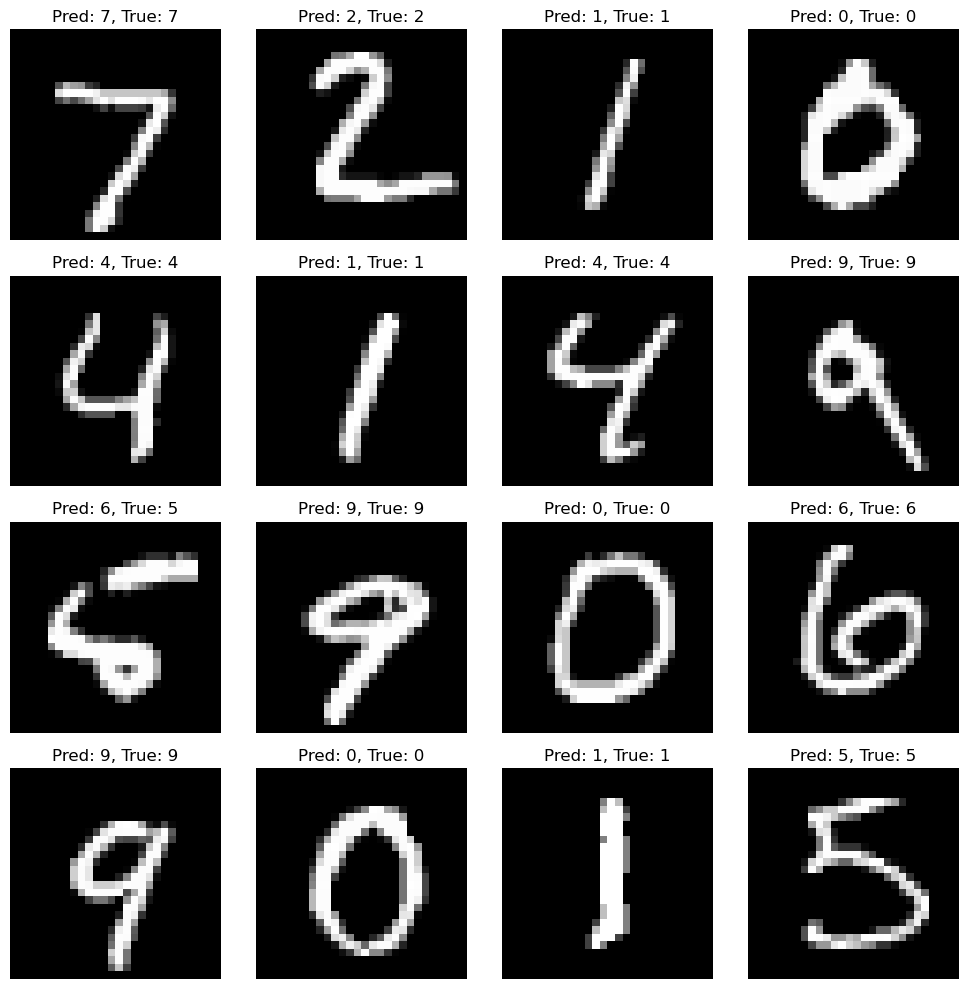

In [39]:
# plot some sample predictions 
# ensure model is in eval mode
model.eval()

# get some test data
images, labels = next(iter(test_loader))
images, labels = images.to(device), labels.to(device)

# get model predictions for this batch 
with torch.no_grad():
    outputs = model(images)
    preds = outputs.argmax(dim=1)

# plot some sample images with predicted and true labels
plt.figure(figsize=(10,10))
for i in range(16):
    plt.subplot(4, 4, i+1)
    imshow_normalized(images[i].cpu())
    plt.title(f"Pred: {preds[i].item()}, True: {labels[i].item()}")
    plt.axis('off')
plt.tight_layout()
plt.show()


## Step 7 — Saving and loading models

Once you're satisfied with the trained model, save the `state_dict`. The code below is provided — use it after training.


In [41]:
# its good practice to save your model's learned weights (state_dict) after training so you can load them later without retraining

# Example: saving and loading (run AFTER training)
PATH = 'mnist_model_student.pth'
torch.save(model.state_dict(), PATH)
# To load:
model_loaded = NeuralNetwork().to(device)
model_loaded.load_state_dict(torch.load(PATH))
model_loaded.eval()

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU(inplace=True)
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU(inplace=True)
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)

### Final notes for students
- Try different architectures, learning rates, optimizers and schedulers.
- Experiment with batch size and number of epochs.
- Compare normalizing with dataset stats vs simple `mean=0.5,std=0.5`.
- Critically analyze your results, how is your model performing? How can it be improved?
